Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import svm

Data Collection and Processing

In [3]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/workspaces/AI-Powered-Health-Automate-Disease-Diagnosis-system/datasets/heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [5]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

/tmp/ipykernel_67419/33767032.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


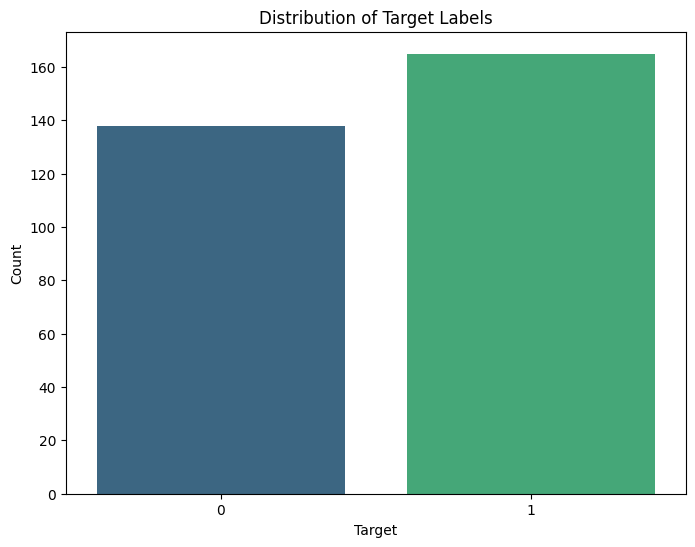

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# checking the distribution of Target Variable
target_counts = heart_data['target'].value_counts()

# plotting the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Labels')
plt.show()

1 --> Defective Heart

0 --> Healthy Heart

Splitting X_test and Y_test from heart dataset

In [10]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=42)

In [15]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(303, 13) (242, 13) (61, 13)
(303,) (242,) (61,)


Model Evaluation

In [ ]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model_path, X_test, Y_test):
    """
    Loads a trained model and evaluates its performance using a classification report and confusion matrix.

    Parameters:
    - model_path (str): Path to the saved model (.pkl file).
    - X_test (numpy array or DataFrame): Test features.
    - y_test (numpy array or Series): True labels for test data.

    Returns:
    - None (Prints classification report & displays confusion matrix)
    """
    # Load the saved model
    model = joblib.load(model_path)

    # Make predictions
    y_pred = model.predict(X_test)

    # Generate classification report
    print("\n📌 Classification Report:")
    print(classification_report(Y_test, y_pred))

    # Compute confusion matrix
    cm = confusion_matrix(Y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

ZZ
# Path to saved model
model_path = "heart_disease_model.sav"

# Evaluate model
evaluate_model(model_path, X_test, Y_test)

KeyError: 123

Accuracy Score

In [9]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

NameError: name 'model' is not defined

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


In [ ]:
from sklearn.metrics import log_loss

# Assuming model is already trained with model.fit(X_train, Y_train)

# For calculating log loss, we need the probabilities of the positive class (e.g., class "1")
# We use model.predict_proba to get these probabilities
# predict_proba returns probabilities of all classes, we select the column for class "1"
Y_train_proba = model.predict_proba(X_train)[:, 1]
Y_test_proba = model.predict_proba(X_test)[:, 1]

# Calculate log loss for training data
train_log_loss = log_loss(Y_train, Y_train_proba)

# Calculate log loss for test data
test_log_loss = log_loss(Y_test, Y_test_proba)

print(f"Training Data Log Loss: {train_log_loss:.4f}")
print(f"Test Data Log Loss: {test_log_loss:.4f}")

Training Data Log Loss: 0.3346
Test Data Log Loss: 0.4536


In [ ]:
from sklearn.metrics import make_scorer, log_loss

# Define log loss as the scoring metric
scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the hyperparameters distribution
param_dist = {
    'C': uniform(0.001, 100),  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear', 'saga'],  # Optimization algorithm
}

# Initialize RandomizedSearchCV with logistic regression model and hyperparameters distribution
random_search = RandomizedSearchCV(logistic_regression, param_distributions=param_dist, n_iter=100, cv=5, scoring=scorer, random_state=42)

# Fit the randomized search to find the best hyperparameters
random_search.fit(X_train, Y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = random_search.best_estimator_
train_log_loss = log_loss(Y_train, best_model.predict_proba(X_train))
test_log_loss = log_loss(Y_test, best_model.predict_proba(X_test))

print(f"Training Data Log Loss: {train_log_loss:.4f}")
print(f"Test Data Log Loss: {test_log_loss:.4f}")


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

Best Hyperparameters: {'C': 0.6962130531190703, 'penalty': 'l2', 'solver': 'liblinear'}
Training Data Log Loss: 0.3349
Test Data Log Loss: 0.4413


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss

# Assuming X_train, Y_train, X_test, Y_test are already defined
# Ensure Y_train and Y_test are in the format {-1, 1} for binary classification

# Initialize and train the SVM model
model = SVC(kernel='linear', C=1.0, random_state=42)  # Example: linear kernel, you can adjust this
model.fit(X_train, Y_train)

# SVC's decision function gives the distance of the samples from the decision boundary
# These distances are then used to calculate the hinge loss
train_distances = model.decision_function(X_train)
test_distances = model.decision_function(X_test)

# Manually calculating the hinge loss
train_hinge_loss = hinge_loss(Y_train, train_distances)
test_hinge_loss = hinge_loss(Y_test, test_distances)

print(f"Training Data Hinge Loss: {train_hinge_loss:.4f}")
print(f"Test Data Hinge Loss: {test_hinge_loss:.4f}")

Training Data Hinge Loss: 0.3369
Test Data Hinge Loss: 0.4579


Building a Predictive System

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease symptoms')
else:
  print('The Person has Heart Disease symptoms')

[0]
The Person does not have a Heart Disease symptoms


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [ ]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


In [ ]:
# Load the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

# Make a prediction on new data
new_data = [1, 85, 66, 29, 0, 0.267, 0.351, 41]
prediction = loaded_model.predict([new_data])

# Print the prediction
print(prediction)

[0]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
